In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
data = pd.DataFrame(iris.data,columns= iris.feature_names)
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
## Our target value is in target parameter so lets include that as well in our data frame
data['target'] = iris.target
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Here we see the target column has attributes of 0,1,2 so lets see what they are. and include them in data frame Shall we ?

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
data['target_species'] = data.target.apply(lambda c: iris.target_names[c])
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_species
3,4.6,3.1,1.5,0.2,0,setosa
88,5.6,3.0,4.1,1.3,1,versicolor
38,4.4,3.0,1.3,0.2,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
69,5.6,2.5,3.9,1.1,1,versicolor


In [9]:
#lets save data for further pruporse in csv form 
data.to_csv('irisdata.csv')

### Some Visualizations

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# While visualizing we will vizualise in 2 Dimenssion so lets split our data into three dataframe as per the target_species
data1 = data[data.target_species == 'setosa']
data2 = data[data.target_species == 'versicolor']
data3 = data[data.target_species == 'virginica']
data1.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_species
12,4.8,3.0,1.4,0.1,0,setosa
35,5.0,3.2,1.2,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa
17,5.1,3.5,1.4,0.3,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa


Text(0, 0.5, 'Sepal Width')

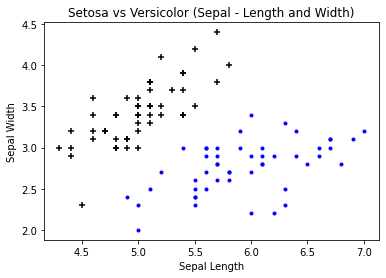

In [39]:
#Lets plot scatter plot for setosa and versicolor in term of Sepal Length and Sepal Width
plt.title('Setosa vs Versicolor (Sepal - Length and Width)')
plt.scatter(data1['sepal length (cm)'],data1['sepal width (cm)'], color = 'black',marker = '+')
plt.scatter(data2['sepal length (cm)'], data2['sepal width (cm)'],color="blue",marker='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

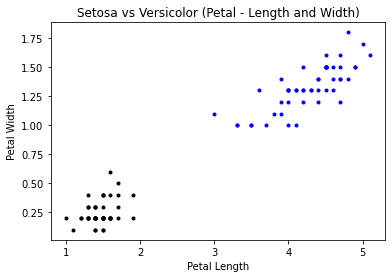

In [40]:
#Lets plot scatter plot for setosa and versicolor in term of Petal Length and Petal Width
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'] , color = 'black' , marker = '.')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color = 'blue',marker = '.')
plt.title('Setosa vs Versicolor (Petal - Length and Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

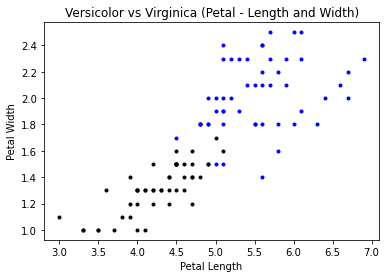

In [41]:
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'] , color = 'black' , marker = '.')
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'],color = 'blue',marker = '.')
plt.title('Versicolor vs Virginica (Petal - Length and Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

This are simple visualization and we have only used 2 features for visualization but in model we will use all four features i.e.  sepal length ,sepal width,petal length,petal width.

In [42]:
# Training and testing the dataset - Spliting of the Dataset 
from sklearn.model_selection import train_test_split

The training and testing is to be done in original dataframe

In [43]:
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_species
135,7.7,3.0,6.1,2.3,2,virginica
72,6.3,2.5,4.9,1.5,1,versicolor
125,7.2,3.2,6.0,1.8,2,virginica
94,5.6,2.7,4.2,1.3,1,versicolor
119,6.0,2.2,5.0,1.5,2,virginica


In [53]:
X = data.drop(['target','target_species'] , axis = 'columns')
y = data.target

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [86]:
print('For Independent Varaiable :')
print('The length of training dataset is',len(X_train))
print('The length of testing dataset is',len(X_test))

print('For Dependent Varaiable :')
print('The length of training dataset is',len(y_train))
print('The length of testing dataset is',len(y_test))

For Independent Varaiable :
The length of training dataset is 105
The length of testing dataset is 45
For Dependent Varaiable :
The length of training dataset is 105
The length of testing dataset is 45


In [87]:
from sklearn.svm import SVC
model = SVC()

In [88]:
#Fitting the model using support vector machine
model.fit(X_train, y_train)

SVC()

In [89]:
model.score(X_test,y_test)

0.9777777777777777

In [90]:
model.predict([[7.7,3.0,6.1,2.3]])

array([2])

Here 2 is predicted which means model has classified data flower with provided information as 'virginica'

## Tuning Parameter's

## Regularization (C)

By default regularization is 1 so lets increase it

In [104]:
regularized_model = SVC(C=5)
regularized_model.fit(X_train, y_train)
regularized_model.score(X_test, y_test)

0.9777777777777777

## Kernel 
By Default the kernel is rbf here we have used sigmoid to tune kernel.

In [105]:
sigmoid_kerel_model = SVC(kernel = 'sigmoid')
sigmoid_kerel_model.fit(X_train,y_train)
sigmoid_kerel_model.score(X_test,y_test)

0.28888888888888886

## Gamma
Default gamma is 1

In [107]:
gamma_model = SVC(gamma = 15)
gamma_model.fit(X_train,y_train)
gamma_model.score(X_test,y_test)

0.9555555555555556

## Insights 
1.While training size is 70% and testing size is 30% then we found accuracy of model to be 97%.<br/>
2.Here in Support Vector Classification , the model's parameter used are in it's default mode.Some important parameter like Regularization('C',kernel and Gamma) are not modified/ Tuned , if modified we might get different result and different model score.<br/>
3.After tuning the parameter following accuracy were noticed :<br/>

 - Regularization set as 5 provided accuracy of  <b>97%</b>, So tuning regularization has least affect to model.
 - Kernel set as sigmoid this provided accuracy of <b>28%</b>,so tuning kernel has high affect to model.
 - Gamma set as 15 proviced accuracy of  of  <b>95.6% </b> , so tuning gamma has some affect to model.

